In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import numpy as np
import patsy

%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('2013_movies.csv')
df = df.dropna().set_index('Title')
df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


## Challenge 1

In [4]:
df['Constant'] = [1] * len(df)
df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant
Title,,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1


In [5]:
X = df['Constant']
y = df['DomesticTotalGross']

lm1 = sm.OLS(y, X)
fit1 = lm1.fit()
fit1.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        15:43:59   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant    1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Predicted outcome')

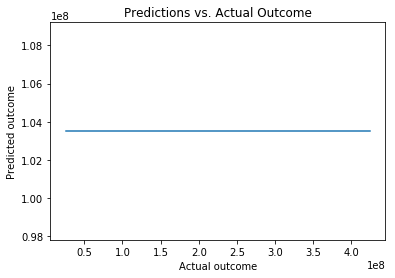

In [6]:
y_predicted = fit1.predict(X)
y_predicted

plt.plot(y, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

Text(0,0.5,'Residuals')

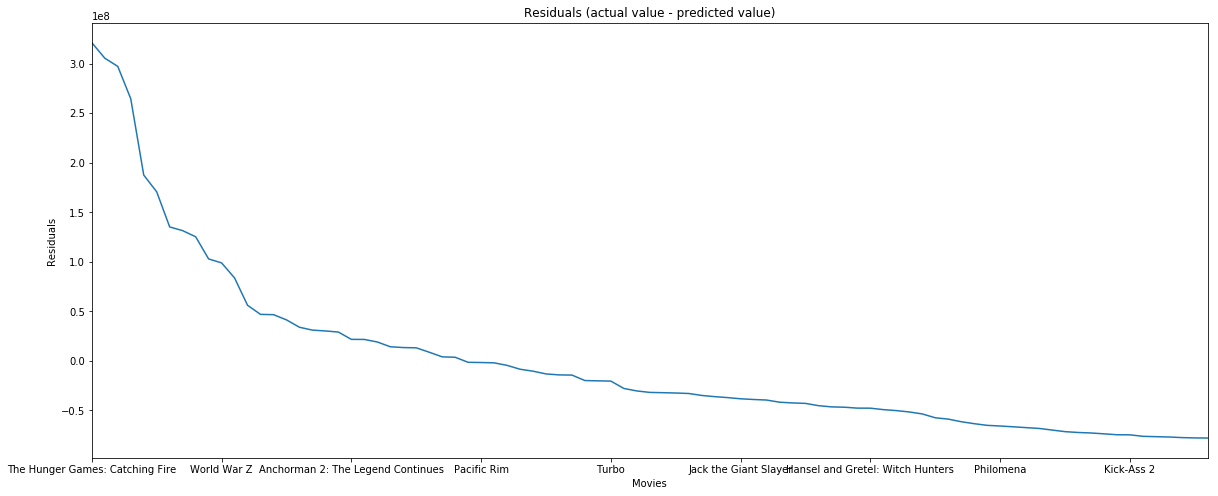

In [14]:
fit1.resid.plot(figsize=(20,8))
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Movies')
plt.ylabel('Residuals')

Text(0.5,1,'Histogram of Residuals')

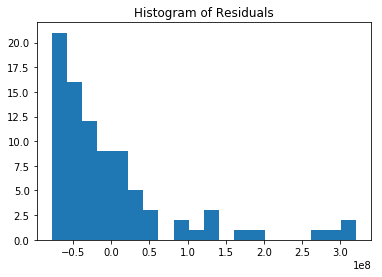

In [13]:
residuals = y - fit1.predict(X)
plt.hist(residuals, bins = 20)
plt.title('Histogram of Residuals')

##### The model predicts the mean of the Domestic Total Gross of the movies. The majority of the movies are around the mean. Some movies, such as  "The Hunger Games" revenued 3 times more than the average.

## Challenge 2

In [84]:
#df['Continuous'] = [i+1 for i in range (0,len(df))]
X2 = df[['Constant','Runtime']]
y = df['DomesticTotalGross']

lm2 = sm.OLS(y, X2)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.458
Date:                Sun, 28 Jan 2018   Prob (F-statistic):             0.0129
Time:                        15:35:08   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3426.
Df Residuals:                      85   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -4.384e+07   5.87e+07     -0.747      0.457   -1.61e+08    7.29e+07
Runtime     1.309e+06   5.15e+05      2.541      0.013    2.85e+05    2.33e+06
==============================================================================
Omnibus:                       46.746   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.557
Skew:                           1.982   Prob(JB):                     8.07e-26
Kurtosis:                       7.021   Cond. No.                         731.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
y_predicted = fit2.predict(X2)

Text(0,0.5,'Domestic Gross Total')

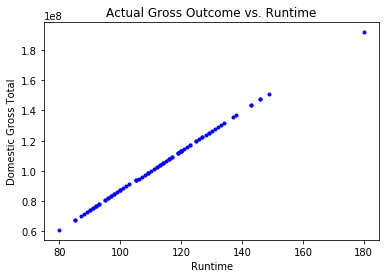

In [80]:
plt.plot(X2['Runtime'], y_predicted, 'b.')
plt.title('Actual Gross Outcome vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Domestic Gross Total')

Text(0,0.5,'Residual')

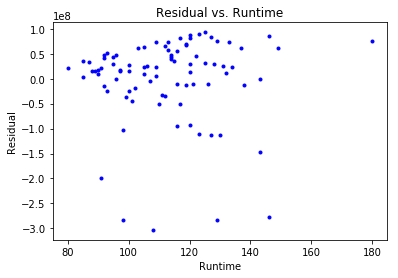

In [81]:
residual = y_predicted - y
## Plot of residuals vs. Budget
plt.plot(X2['Runtime'], residual, 'b.')
plt.title('Residual vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Residual')

##### The linear model shows that for every unit of runtime increased, increases the average revenue in $1,309,000

## Challenge 3

In [102]:
rating_df = pd.get_dummies(df['Rating'])
rating_df.head()

,PG,PG-13,R
Title,,,
The Hunger Games: Catching Fire,0,1,0
Iron Man 3,0,1,0
Frozen,1,0,0
Despicable Me 2,1,0,0
Man of Steel,0,1,0


In [129]:
df3 = pd.merge(df.reset_index(), rating_df.reset_index(), on = 'Title').set_index('Title')
df3.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant,PG,PG-13,R
Title,,,,,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1,0,1,0
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1,0,1,0
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1,1,0,0
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1,1,0,0
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1,0,1,0


In [132]:
X3 = df3[['Constant','PG','PG-13', 'R']]
y = df3['DomesticTotalGross']

lm3 = sm.OLS(y, X3)
fit3 = lm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Sun, 28 Jan 2018   Prob (F-statistic):             0.0440
Time:                        16:36:03   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant    8.098e+07   7.63e+06     10.609      0.000    6.58e+07    9.62e+07
PG          5.097e+07   1.79e+07      2.845      0.006    1.53e+07    8.66e+07
PG-13       3.675e+07   1.23e+07      2.999      0.004    1.24e+07    6.11e+07
R          -6.747e+06    1.3e+07     -0.518      0.606   -3.27e+07    1.92e+07
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                     7.10e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### An average movie's domestic gross starts around $80,980,000, PG and PG-13 movies could bring in more ticket gross, while R would bring less than average.

## Challenge 4

In [133]:
X4 = df3[['Constant','Budget','Runtime','PG','PG-13', 'R']]
y = df3['DomesticTotalGross']

lm4 = sm.OLS(y, X4)
fit4 = lm4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           6.38e-06
Time:                        16:52:12   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -1.103e+07   4.13e+07     -0.267      0.790   -9.31e+07    7.11e+07
Budget         0.6957      0.172      4.054      0.000       0.354       1.037
Runtime     6.254e+05   5.33e+05      1.173      0.244   -4.35e+05    1.69e+06
PG          1.412e+07   1.81e+07      0.779      0.438   -2.19e+07    5.02e+07
PG-13      -1.335e+07   2.01e+07     -0.666      0.508   -5.33e+07    2.66e+07
R          -1.179e+07   2.08e+07     -0.566      0.573   -5.32e+07    2.97e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     8.62e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Challenge 5

In [135]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X4, y, train_size = 0.75)

In [137]:
lm5 = sm.OLS(y_train, X_train)
fit5 = lm5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     10.36
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.91e-06
Time:                        17:02:50   Log-Likelihood:                -1270.7
No. Observations:                  65   AIC:                             2551.
Df Residuals:                      60   BIC:                             2562.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -3.376e+07   4.76e+07     -0.709      0.481   -1.29e+08    6.15e+07
Budget         0.8863      0.201      4.412      0.000       0.485       1.288
Runtime     8.359e+05   6.18e+05      1.352      0.181   -4.01e+05    2.07e+06
PG          1.264e+07   2.15e+07      0.589      0.558   -3.03e+07    5.55e+07
PG-13      -2.494e+07   2.27e+07     -1.099      0.276   -7.03e+07    2.05e+07
R          -2.146e+07   2.47e+07     -0.869      0.389   -7.09e+07     2.8e+07
==============================================================================
Omnibus:                       24.923   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.999
Skew:                           1.390   Prob(JB):                     1.25e-09
Kurtosis:                       5.723   Cond. No.                     6.80e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [141]:
## Now predict on the test set with the training model
y_pred = fit5.predict(X_test)

Text(0,0.5,'Predicted y value')

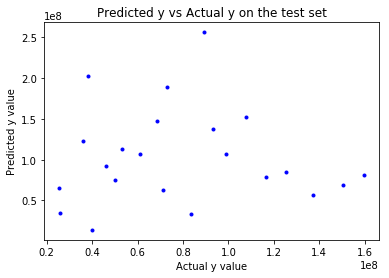

In [139]:
plt.plot(y_test, y_pred, 'b.')
plt.title('Predicted vs Actual outcomes')
plt.xlabel('Actual outcomes')
plt.ylabel('Predictions')